## **1. RGB to CIELAB Conversion**

(-0.5, 639.5, 852.5, -0.5)

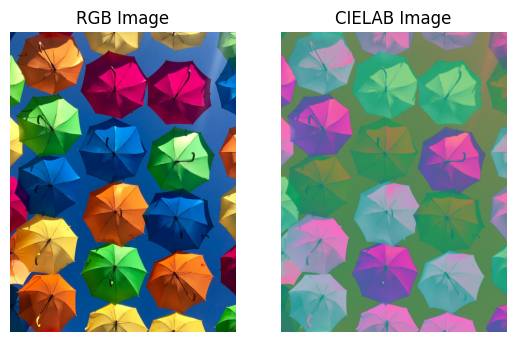

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# RGB to Lab conversion function
def rgb2lab(inputColor):
    num = 0
    RGB = [0, 0, 0]

    for value in inputColor:
        value = float(value) / 255

        if value > 0.04045:
            value = ((value + 0.055) / 1.055) ** 2.4
        else:
            value = value / 12.92

        RGB[num] = value * 100
        num = num + 1

    XYZ = [0, 0, 0]

    X = RGB[0] * 0.4124 + RGB[1] * 0.3576 + RGB[2] * 0.1805
    Y = RGB[0] * 0.2126 + RGB[1] * 0.7152 + RGB[2] * 0.0722
    Z = RGB[0] * 0.0193 + RGB[1] * 0.1192 + RGB[2] * 0.9505

    XYZ[0] = X / 95.047
    XYZ[1] = Y / 100.0
    XYZ[2] = Z / 108.883

    num = 0
    for value in XYZ:
        if value > 0.008856:
            value = value ** (1/3.0)
        else:
            value = (7.787 * value) + (16 / 116)

        XYZ[num] = value
        num = num + 1

    L = (116 * XYZ[1]) - 16
    a = 500 * (XYZ[0] - XYZ[1])
    b = 200 * (XYZ[1] - XYZ[2])

    return [L, a, b]

# Load the image using OpenCV
image = cv2.imread('img/umbrellas.jpg')

# Convert the image from BGR (default in OpenCV) to RGB
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Prepare an empty array for storing the Lab values
lab_image = np.zeros_like(rgb_img, dtype=float)

# Loop through each pixel in the image
for i in range(rgb_img.shape[0]):
    for j in range(rgb_img.shape[1]):
        # Get the RGB value of the pixel
        rgb_pixel = rgb_img[i, j]
        
        # Convert the RGB pixel to Lab
        lab_pixel = rgb2lab(rgb_pixel)
        
        # Store the Lab values in the output array
        lab_image[i, j] = lab_pixel

# Since Lab values can be negative, normalize and convert to uint8 for display/saving
lab_image[:, :, 0] = np.clip(lab_image[:, :, 0] * 255 / 100, 0, 255)  # L channel scaling
lab_image[:, :, 1] = np.clip(lab_image[:, :, 1] + 128, 0, 255)  # a channel scaling
lab_image[:, :, 2] = np.clip(lab_image[:, :, 2] + 128, 0, 255)  # b channel scaling

# Convert back to uint8 for OpenCV compatibility
lab_image = lab_image.astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lab_image)
plt.title('CIELAB Image')
plt.axis('off')


## **2. Image Color Segmentation**

Text(0.5, 1.0, 'Value')

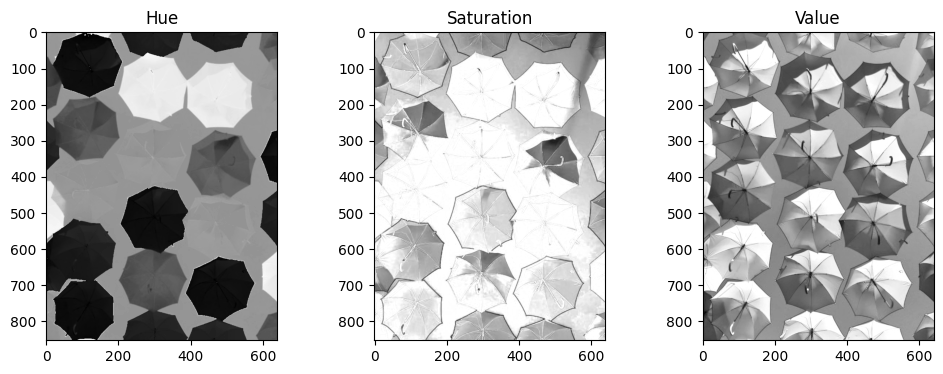

In [8]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv

img_hsv = rgb2hsv(rgb_img)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(img_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(img_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(img_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value')

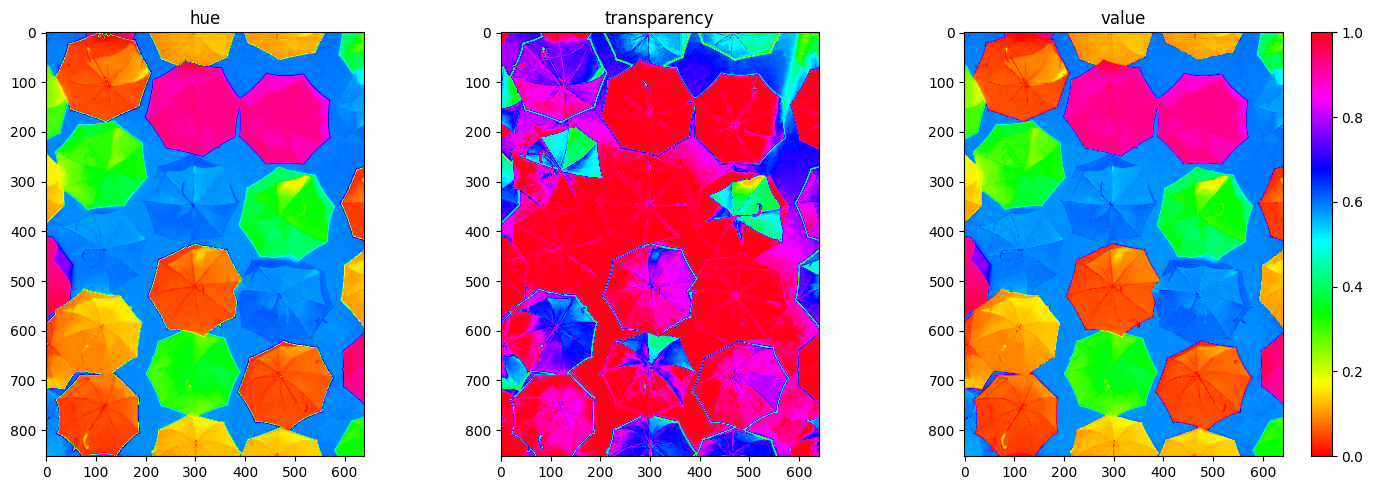

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(img_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(img_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(img_hsv[:,:,0],cmap='hsv')) 
fig.tight_layout()

(-0.5, 639.5, 852.5, -0.5)

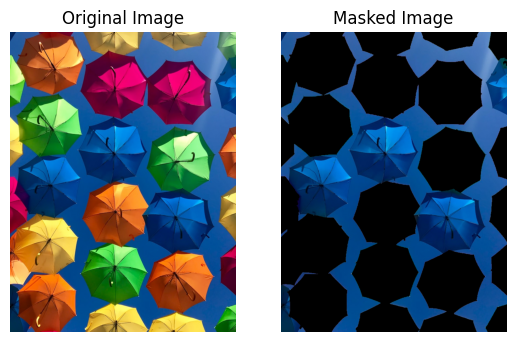

In [10]:
#refer to hue channel (in the colorbar)
lower_mask = img_hsv[:,:,0] > 0.5 
#refer to hue channel (in the colorbar)
upper_mask = img_hsv[:,:,0] < 0.7 
#refer to transparency channel (in the colorbar)
saturation_mask = img_hsv[:,:,1] > 0.3 
 
mask = upper_mask*lower_mask*saturation_mask
red = rgb_img[:,:,0]*mask
green = rgb_img[:,:,1]*mask
blue = rgb_img[:,:,2]*mask
img_masked = np.dstack((red,green,blue))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_masked)
plt.title('Masked Image')
plt.axis('off')


(-0.5, 639.5, 852.5, -0.5)

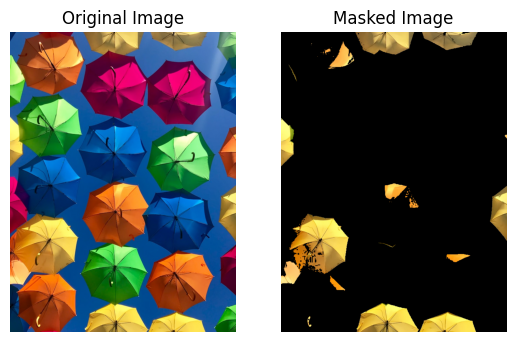

In [11]:
#refer to hue channel (in the colorbar)
lower_mask = img_hsv[:,:,0] > 0.09 
#refer to hue channel (in the colorbar)
upper_mask = img_hsv[:,:,0] < 0.2 
#refer to transparency channel (in the colorbar)
saturation_mask = img_hsv[:,:,1] > 0.4 
 
mask = upper_mask*lower_mask*saturation_mask
red = rgb_img[:,:,0]*mask
green = rgb_img[:,:,1]*mask
blue = rgb_img[:,:,2]*mask
img_masked = np.dstack((red,green,blue))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_masked)
plt.title('Masked Image')
plt.axis('off')


(-0.5, 639.5, 852.5, -0.5)

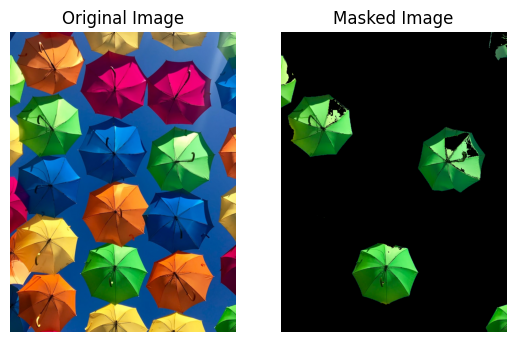

In [12]:
#refer to hue channel (in the colorbar)
lower_mask = img_hsv[:,:,0] > 0.2 
#refer to hue channel (in the colorbar)
upper_mask = img_hsv[:,:,0] < 0.475 
#refer to transparency channel (in the colorbar)
saturation_mask = img_hsv[:,:,1] > 0.4 
 
mask = upper_mask*lower_mask*saturation_mask
red = rgb_img[:,:,0]*mask
green = rgb_img[:,:,1]*mask
blue = rgb_img[:,:,2]*mask
img_masked = np.dstack((red,green,blue))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_masked)
plt.title('Masked Image')
plt.axis('off')


(-0.5, 639.5, 852.5, -0.5)

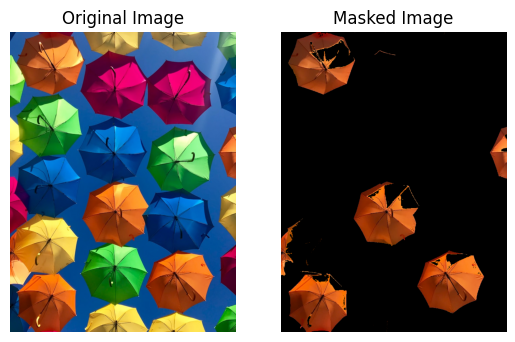

In [13]:
#refer to hue channel (in the colorbar)
lower_mask = img_hsv[:,:,0] > 0.0 
#refer to hue channel (in the colorbar)
upper_mask = img_hsv[:,:,0] < 0.08 
#refer to transparency channel (in the colorbar)
saturation_mask = img_hsv[:,:,1] > 0.5 
 
mask = upper_mask*lower_mask*saturation_mask
red = rgb_img[:,:,0]*mask
green = rgb_img[:,:,1]*mask
blue = rgb_img[:,:,2]*mask
img_masked = np.dstack((red,green,blue))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_masked)
plt.title('Masked Image')
plt.axis('off')


(-0.5, 639.5, 852.5, -0.5)

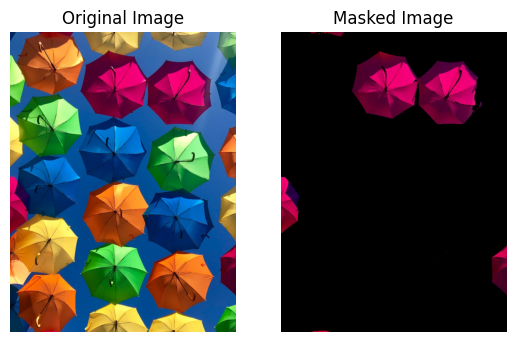

In [14]:
#refer to hue channel (in the colorbar)
lower_mask = img_hsv[:,:,0] > 0.7 
#refer to hue channel (in the colorbar)
upper_mask = img_hsv[:,:,0] < 1 
#refer to transparency channel (in the colorbar)
saturation_mask = img_hsv[:,:,1] > 0.8 
 
mask = upper_mask*lower_mask*saturation_mask
red = rgb_img[:,:,0]*mask
green = rgb_img[:,:,1]*mask
blue = rgb_img[:,:,2]*mask
img_masked = np.dstack((red,green,blue))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_masked)
plt.title('Masked Image')
plt.axis('off')
